<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

🌟 Hi Jeel — thanks for the submission!  
    
Below is a detailed review ;)
    
---

✅ **Strengths**

- **Thorough EDA**:  
  You did a great job exploring the dataset. The histogram, boxplot, and age group visualizations are well-interpreted and clearly support the modeling context. Your detailed insights about distribution skewness and representation across age groups are spot-on.

- **Clean model structure**:  
  The modeling pipeline is well-organized, with reusable functions for loading data, building the model, and training. Using ResNet50 with a regression head is appropriate, and your training configuration is sound.

- **Model meets the MAE requirement**:  
  Final validation MAE of **7.65** is below the target threshold of 8. You also identified the best performance around epoch 17, showing good critical analysis of the training dynamics.

- **Reflection on model performance**:  
  Your conclusions about overfitting and the plateau after epoch 10 demonstrate a good understanding of training/validation tradeoffs.

---

🛠️ **Suggestions for Improvement**

- **Train/Test Split**:  
  You used the same `labels` DataFrame for both training and validation. Ideally, you should apply a `validation_split` within `ImageDataGenerator` or split the dataset manually into `train_labels` and `test_labels`.

- **Data Augmentation**:  
  To address overfitting and dataset imbalance (especially in older age groups), consider adding basic augmentation like rotation, zoom, or brightness adjustments to improve generalization.

- **Conclusions Formatting**:  
  While your final section is very detailed, breaking it into clearer bullet points would make it more digestible.

---

✅ **Final Verdict: Approved**

Excellent work, Jeel! You built a well-structured model, ran insightful EDA, and met the performance goal with a thoughtful analysis. You're clearly grasping the key concepts of applied deep learning and regression modeling. Keep it up! 👏

</div>

# SafeSale: Preventing Underage Sales 

## Introduction

The project is based on to develop and evaluate a model for verifying individuals age that helps the supermarket chain Good Seed adhere to alcohol laws by making sure that they do not sell alcohol to underage individuals. For developing the model, computer vision methods will be used to determine age of a person from a photo captured using cameras installed in the checkout area of the shops.

## Initialization

In [5]:
# Import necessary libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [6]:
# Load the dataset
labels = pd.read_csv('/datasets/faces/labels.csv')

In [7]:
# Load the dataset
train_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Define the data generator for training
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [9]:
# Display the first few rows of the labels DataFrame
display(labels.head())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


## EDA

In [10]:
# check for missing values in the labels DataFrame
labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [11]:
# Check for duplicates in the labels DataFrame
labels.duplicated().sum()

0

In [12]:
# Display the number of rows and columns in the labels DataFrame
n_rows, n_cols= labels.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns.")

The DataFrame has 7591 rows and 2 columns.


In [13]:
# Display information about the labels DataFrame
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [14]:
# Display descriptive statistics of the labels DataFrame
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


There is no duplicates or missing values found in the dataset. 

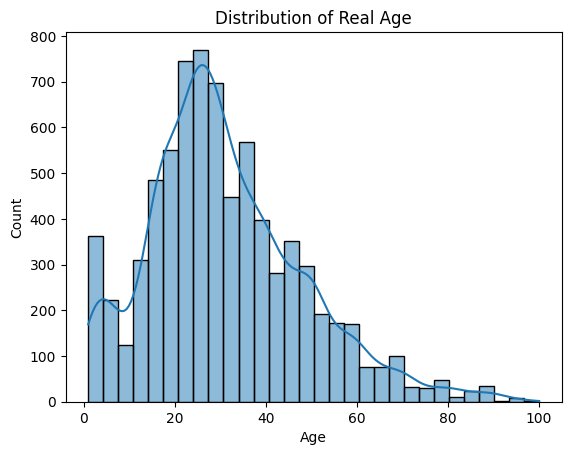

In [15]:
# Generate a histogram to visualize the distribution of ages in the dataset
sns.histplot(data=labels, x='real_age', bins=30, kde=True)
plt.title("Distribution of Real Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

###### Insights

The above graph is a histogram with a KDE (Kernel Density Estimate) plot overlay. It shows the distribution of real age of indivduals whose images are present in the dataset. The histogram displays the frequency of individuals at different age intervals. Here the x-axis represents age while, the y-axis represents the count of individuals in each age bin.

The most frequent age range appears to be between 20 and 30, with highest peak around 25 years old. This indicates that the large number of individuals in this datasets are in their mid-20s. Also, there is a gradual decline in the number of individuals with age above 35 with significantly fewere beyond 60 years. 

The dataset is right-skewed, suggesting that there are fewer older individuals in the dataset. A long tail extending towards right end means older individuals whose age is above 50 are less common among older individuals.

###### Conclusion

From the above histogram, it can be known that the dataset is doinated by younger individuals, especially in their 20s and 30s. The datasets is not normally distributed among all age groups which can be known as there is a gradual decline in representation with increasing age. 

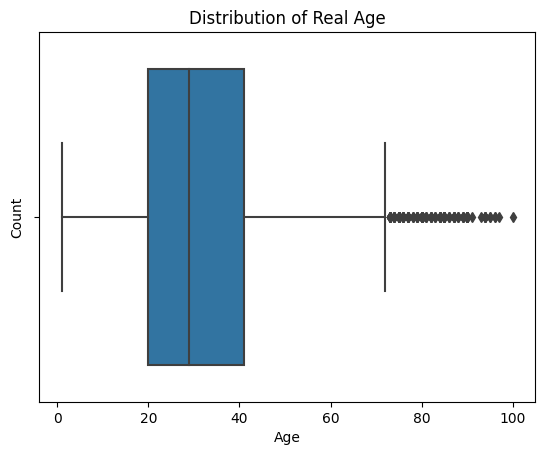

In [16]:
# Generate a boxplot to visualize the distribution of ages in the dataset
sns.boxplot(data=labels, x='real_age')
plt.title("Distribution of Real Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

###### Insights and Conclusion

The above graph is a boxplot which gives a summary of the distribution of the dataset. It shows the distribution of real age of indivduals whose images are present in the dataset. The thick line inside the box marks the median which appears to be around 30 years old suggesting most individuals are in there 20s and 30s.

The interquartile Range (IQR) shows where the 50% of the datasets lies. From this it is known that most individuals are between ~20 to ~50 age group. 

The straight lines (maximum) ages extends from 0 to 75, suggests that majority of datapoints (individuals) fall within this range. Lastly, it can be seen that there are numerous outliers on the older end indicating that there are fewer individuals whose ages are higher than the majority of the individuals in the datasets. 

Overall, this boxplot indicates similar insights suggested from the above histogram.

### Findings

In [17]:
# Divide the dataset into age groups for better visualization
labels['age_group'] = pd.cut(labels['real_age'], bins=[0, 10, 20, 30, 40, 50, 60, 100])

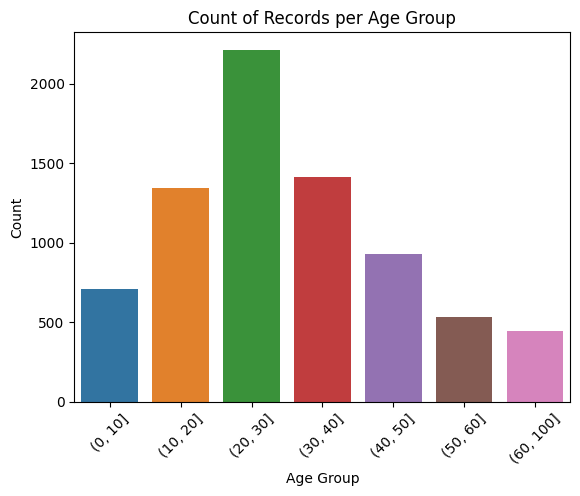

In [18]:
# Generate a bar plot to visualize the count of records per age group
sns.countplot(x='age_group', data=labels)
plt.title("Count of Records per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

###### Insights andConclusion

The above graph is a bar chart that provides a grouped summary of the dataset by age group. 

Overall, similar to previous findings from histogram and boxplot, it is seen that the dataset is concentrated in the 20-30 age group. Along with this, a gradual decline can be seen after 30.

Young individuals are most represented, while elderly individuals (60+) are underrepresented suggesting that this might introduce bias in the model anaylsis which relies on this dataset. 


## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [19]:
# 
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    
    train_datagen = ImageDataGenerator(rescale=1./255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

    return train_gen_flow

In [20]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    test_datagen = ImageDataGenerator(rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

    return test_gen_flow

In [21]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [22]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
        
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [23]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

Epoch 1/20


356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921


Epoch 2/20


356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035


Epoch 3/20


356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454


Epoch 4/20


356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481


Epoch 5/20


356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192


Epoch 6/20


356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332


Epoch 7/20


356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359


Epoch 8/20


356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239


Epoch 9/20


356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529


Epoch 10/20


356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629


Epoch 11/20


356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866


Epoch 12/20


356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591


Epoch 13/20


356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467


Epoch 14/20


356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401


Epoch 15/20


356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841


Epoch 16/20


356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304


Epoch 17/20


356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419


Epoch 18/20


356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226


Epoch 19/20


356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908


Epoch 20/20


356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

## Conclusions

The project is based on to develop and evaluate a model for verifying individuals age that helps the supermarket chain Good Seed adhere to alcohol laws by making sure that they do not sell alcohol to underage individuals. 

The output from the GPU platform shows the performance log of a regression model which is predicting age over 20 epochs. The key metrics to evaluate the model are loss - Mean Squared Error (MSE), Mean Absolute Error on training set (mae), val_loss - Validation Loss, val_mae - Validation MAE on validation set. 

For training performances, the model improves steadily as 'loss' drops from 95.35 to 17.03 and 'mae' drops from 7.43 to 3.18. This shows that the model is fitting the training data well. 

While for validation performances, the model is not doing as better as for training dataset. This can be seen as 'val_mae' drops from 8.48 to 7.65 with best validation MAE occuring at epoch 17 (6.64) while validation loss fluctuates but not as good as training with a spike at epoch 12 (185.63) lowest at epoch 17 (78.43). 

Overall, there are signs of overfitting which can be seen as training error continues to drop, but validation error flattens and fluctuates after epoch 8. There is no significant gain in validation MAE after epoch 10. Lastly, optimal model performance likely occured at epoch 17, where the validation MAE was lowest. 

# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis are presented in the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model training output has been copied to the final notebook
- [x]  The findings have been provided based on the results of the model training